<a href="https://colab.research.google.com/github/AKUSAbeysinghe/emnist-model-project-/blob/main/Hand_Written_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Load EMNIST/byclass with supervised format
(ds_train, ds_test), ds_info = tfds.load(
    'emnist/byclass',
    split=['train', 'test'],
    as_supervised=True,
    with_info=True
)

# Rotate images to match character orientation
def preprocess(image, label):
    image = tf.image.rot90(image, k=3)  # EMNIST needs this
    image = tf.cast(image, tf.float32) / 255.0  # Normalize
    image = tf.expand_dims(image, -1)  # Add channel
    return image, label

# Prepare train and test datasets
train_dataset = ds_train.map(preprocess).shuffle(10000).batch(128)
test_dataset = ds_test.map(preprocess).batch(128)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/byclass/incomplete.VMRGJX_3.1.0/emnist-train.tfrecord*...:   0%|   …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/byclass/incomplete.VMRGJX_3.1.0/emnist-test.tfrecord*...:   0%|    …

Dataset emnist downloaded and prepared to /root/tensorflow_datasets/emnist/byclass/3.1.0. Subsequent calls will reuse this data.


In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Load EMNIST/byclass dataset
(ds_train, ds_test), ds_info = tfds.load(
    'emnist/byclass',
    split=['train', 'test'],
    as_supervised=True,
    with_info=True
)

# Preprocess function: rotate, normalize, add channel
def preprocess(image, label):
    image = tf.image.rot90(image, k=3)              # Fix orientation
    image = tf.cast(image, tf.float32) / 255.0      # Normalize pixels to [0,1]
    image = tf.expand_dims(image, -1)                # Add channel dimension
    return image, label

# Augmentation function: brightness and contrast only (simple and effective)
def augment(image, label):
    image = tf.image.random_brightness(image, max_delta=0.1)
    image = tf.image.random_contrast(image, lower=0.9, upper=1.1)
    image = tf.clip_by_value(image, 0, 1)
    return image, label

# Prepare train dataset: preprocess + augment + shuffle + batch + prefetch
train_dataset = ds_train.map(preprocess).map(augment).shuffle(10000).batch(128).prefetch(tf.data.AUTOTUNE)

# Prepare test dataset: preprocess + batch + prefetch (no augmentation here)
test_dataset = ds_test.map(preprocess).batch(128).prefetch(tf.data.AUTOTUNE)


In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(62, activation='softmax')  # 62 classes in EMNIST/byclass
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#Removing the warning only wrote the bellow code previous warning is normal but all the way without warning work process use bellow code

In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(28,28,1)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(62, activation='softmax')
])


In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=25
)


Epoch 1/25
5453/5453 ━━━━━━━━━━━━━━━━━━━━ 154s 27ms/step - accuracy: 0.8027 - loss: 0.6238 - val_accuracy: 0.8542 - val_loss: 0.3910
Epoch 2/25
5453/5453 ━━━━━━━━━━━━━━━━━━━━ 147s 27ms/step - accuracy: 0.8560 - loss: 0.3978 - val_accuracy: 0.8662 - val_loss: 0.3634
Epoch 3/25
5453/5453 ━━━━━━━━━━━━━━━━━━━━ 150s 27ms/step - accuracy: 0.8633 - loss: 0.3710 - val_accuracy: 0.8671 - val_loss: 0.3592
Epoch 4/25
5453/5453 ━━━━━━━━━━━━━━━━━━━━ 138s 25ms/step - accuracy: 0.8682 - loss: 0.3537 - val_accuracy: 0.8705 - val_loss: 0.3481
Epoch 5/25
5453/5453 ━━━━━━━━━━━━━━━━━━━━ 150s 27ms/step - accuracy: 0.8717 - loss: 0.3413 - val_accuracy: 0.8667 - val_loss: 0.3516
Epoch 6/25
5453/5453 ━━━━━━━━━━━━━━━━━━━━ 190s 25ms/step - accuracy: 0.8746 - loss: 0.3310 - val_accuracy: 0.8717 - val_loss: 0.3450
Epoch 7/25
5453/5453 ━━━━━━━━━━━━━━━━━━━━ 142s 26ms/step - accuracy: 0.8776 - loss: 0.3212 - val_accuracy: 0.8686 - val_loss: 0.3554
Epoch 8/25
5453/5453 ━━━━━━━━━━━━━━━━━━━━ 150s 27ms/step - accuracy: 

In [ ]:
#Monitor the Progress

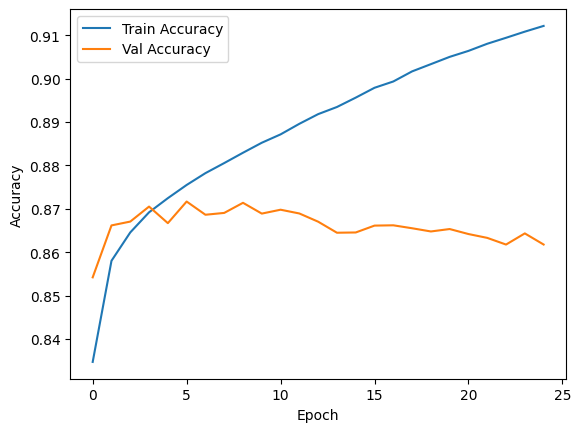

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
#Evaluate Model Accuracy

In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset)
print("Test Accuracy:", test_accuracy)
print("Test Loss:", test_loss)


909/909 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.8625 - loss: 0.4330
Test Accuracy: 0.8617642521858215
Test Loss: 0.4355856776237488


In [ ]:
#Plot Accuracy

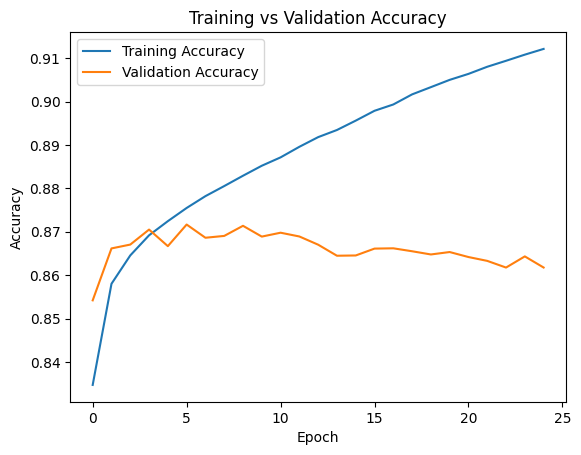

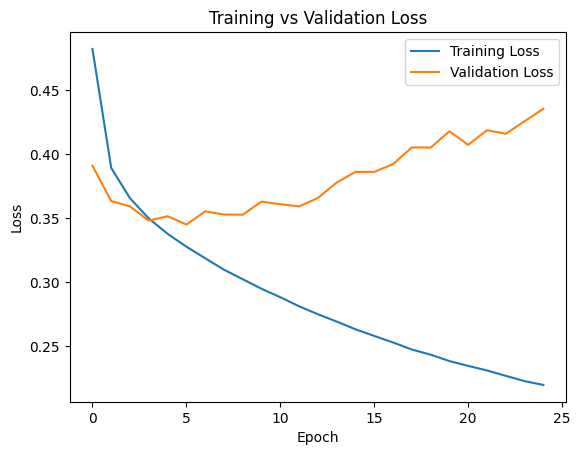

In [ ]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()


In [ ]:
#Saving the Model

In [ ]:
model.save("emnist_model.h5")


In [ ]:
#Save the Model Without the Warning

In [ ]:
model.save("emnist_model.keras")  # Newer format


In [ ]:
#Download the model
from google.colab import files
files.download('emnist_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#When I have the model in keras so the download code for it
from google.colab import files
files.download('emnist_model.keras')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import zipfile

with zipfile.ZipFile('emnist_model.zip', 'w') as zipf:
    zipf.write('emnist_model.h5')


In [ ]:
#continue...........

In [ ]:
# Evaluate model accuracy on test data
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.2f}")


909/909 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.8625 - loss: 0.4330
Test accuracy: 0.86


In [ ]:
#Dataset importing
import tensorflow_datasets as tfds

# Load EMNIST 'byclass'
(ds_train, ds_test), ds_info = tfds.load('emnist/byclass',
                                         split=['train', 'test'],
                                         as_supervised=True,
                                         with_info=True)


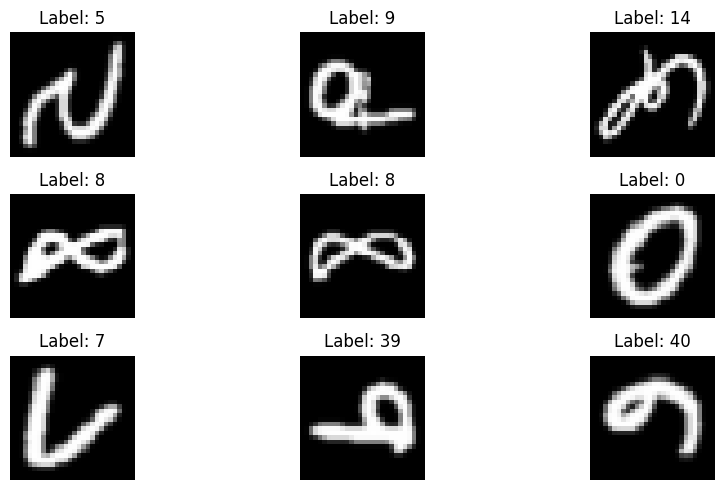

In [ ]:
import matplotlib.pyplot as plt

# Preview 9 samples from training data
plt.figure(figsize=(10, 5))
for i, (image, label) in enumerate(ds_train.take(9)):
    plt.subplot(3, 3, i+1)
    plt.imshow(image.numpy().squeeze(), cmap="gray")
    plt.title(f"Label: {label.numpy()}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
# EMNIST 'byclass' mapping
emnist_labels = [
    '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
    'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
    'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T',
    'U', 'V', 'W', 'X', 'Y', 'Z',
    'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j',
    'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't',
    'u', 'v', 'w', 'x', 'y', 'z'
]

# Then replace the label in title with:
# emnist_labels[label.numpy()]


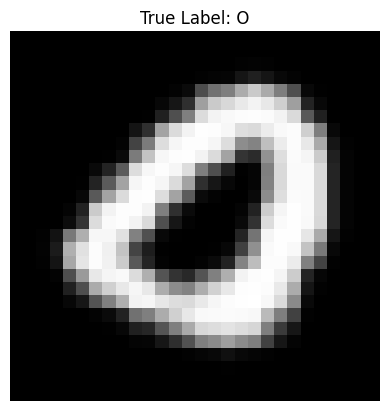

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1 image ekak ganna
for image, label in ds_test.take(1):
    image_np = image.numpy().squeeze()
    true_label = label.numpy()

# Display image
plt.imshow(image_np, cmap='gray')
plt.title(f"True Label: {emnist_labels[true_label]}")
plt.axis('off')
plt.show()


In [ ]:
# Image eka reshape karanna model input walata (batch_size=1)
input_image = np.expand_dims(image_np, axis=0)  # shape: (1, 28, 28)
input_image = np.expand_dims(input_image, axis=-1)  # shape: (1, 28, 28, 1)

# Normalize (0-1 range walata)
input_image = input_image / 255.0

# Predict
prediction = model.predict(input_image)
predicted_label_index = np.argmax(prediction)
predicted_char = emnist_labels[predicted_label_index]

print(f"✅ Predicted Label: {predicted_char}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step
✅ Predicted Label: 0


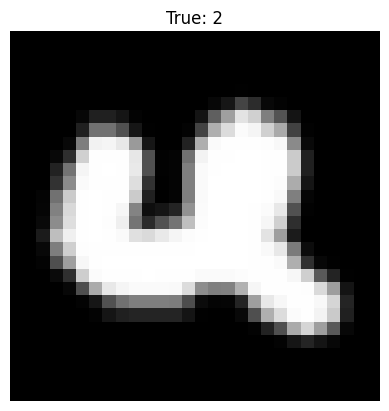

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
✅ True Label: 2
🤖 Predicted by Model: N


In [ ]:
#Check another image on the dataset
# Example: skip 1 image, take the next one
for image, label in ds_test.skip(1).take(1):
    img = image.numpy().squeeze()
    lbl = label.numpy()

    plt.imshow(img, cmap='gray')
    plt.title(f"True: {emnist_labels[lbl]}")
    plt.axis('off')
    plt.show()

    # Prepare input for model
    input_img = np.expand_dims(img, axis=(0, -1)) / 255.0

    prediction = model.predict(input_img)
    predicted_index = np.argmax(prediction)
    predicted_char = emnist_labels[predicted_index]

    print(f"✅ True Label: {emnist_labels[lbl]}")
    print(f"🤖 Predicted by Model: {predicted_char}")


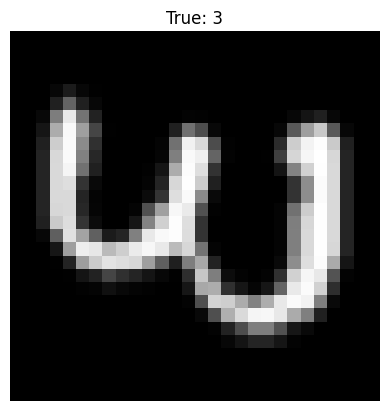

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
✅ True Label: 3
🤖 Predicted by Model: w


In [ ]:
#another imge checking on the dataset
for image, label in ds_test.skip(2).take(1):
    img = image.numpy().squeeze()
    lbl = label.numpy()

    plt.imshow(img, cmap='gray')
    plt.title(f"True: {emnist_labels[lbl]}")
    plt.axis('off')
    plt.show()

    # Prepare image for prediction
    input_img = np.expand_dims(img, axis=(0, -1)) / 255.0

    prediction = model.predict(input_img)
    predicted_index = np.argmax(prediction)
    predicted_char = emnist_labels[predicted_index]

    print(f"✅ True Label: {emnist_labels[lbl]}")
    print(f"🤖 Predicted by Model: {predicted_char}")


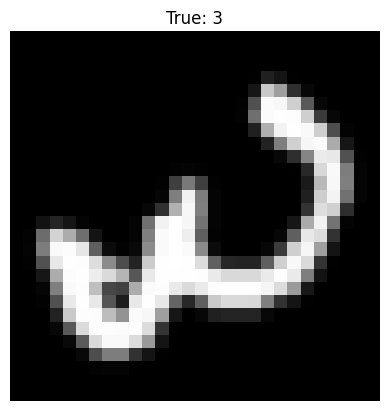

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
✅ True Label: 3
🤖 Predicted by Model: 4


In [ ]:
#check another imge
for image, label in ds_test.skip(3).take(1):
    img = image.numpy().squeeze()
    lbl = label.numpy()

    import matplotlib.pyplot as plt
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {emnist_labels[lbl]}")
    plt.axis('off')
    plt.show()

    # Prepare image for model input
    input_img = np.expand_dims(img, axis=(0, -1)) / 255.0

    # Predict
    prediction = model.predict(input_img)
    predicted_index = prediction.argmax()
    predicted_char = emnist_labels[predicted_index]

    print(f"✅ True Label: {emnist_labels[lbl]}")
    print(f"🤖 Predicted by Model: {predicted_char}")


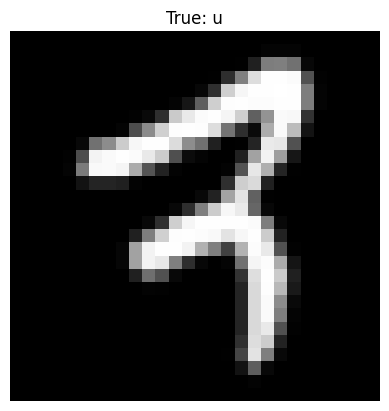

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
✅ True Label: u
🤖 Predicted by Model: F


In [ ]:
#Another image checking
for image, label in ds_test.skip(4).take(1):
    img = image.numpy().squeeze()
    lbl = label.numpy()

    import matplotlib.pyplot as plt
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {emnist_labels[lbl]}")
    plt.axis('off')
    plt.show()

    # Prepare image for model input
    input_img = np.expand_dims(img, axis=(0, -1)) / 255.0

    # Predict
    prediction = model.predict(input_img)
    predicted_index = prediction.argmax()
    predicted_char = emnist_labels[predicted_index]

    print(f"✅ True Label: {emnist_labels[lbl]}")
    print(f"🤖 Predicted by Model: {predicted_char}")


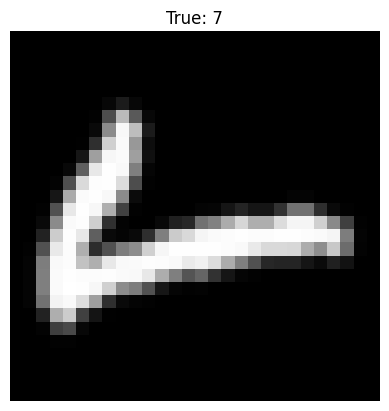

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
✅ True Label: 7
🤖 Predicted by Model: w


In [ ]:
#Another imge
for image, label in ds_test.skip(5).take(1):
    img = image.numpy().squeeze()
    lbl = label.numpy()

    import matplotlib.pyplot as plt
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {emnist_labels[lbl]}")
    plt.axis('off')
    plt.show()

    # Prepare image for model input
    input_img = np.expand_dims(img, axis=(0, -1)) / 255.0

    # Predict
    prediction = model.predict(input_img)
    predicted_index = prediction.argmax()
    predicted_char = emnist_labels[predicted_index]

    print(f"✅ True Label: {emnist_labels[lbl]}")
    print(f"🤖 Predicted by Model: {predicted_char}")


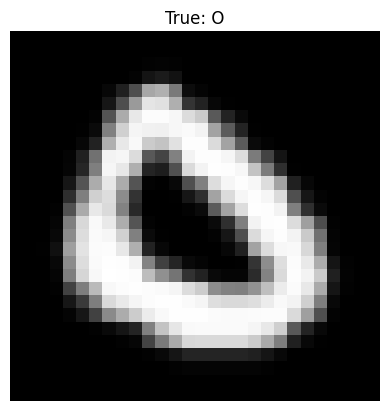

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
✅ True Label: O
🤖 Predicted by Model: O



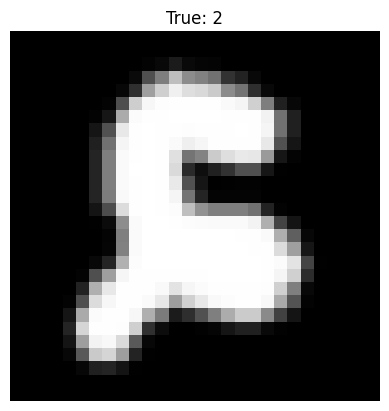

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
✅ True Label: 2
🤖 Predicted by Model: 2



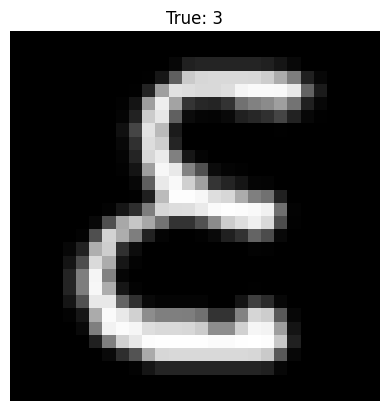

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
✅ True Label: 3
🤖 Predicted by Model: 3



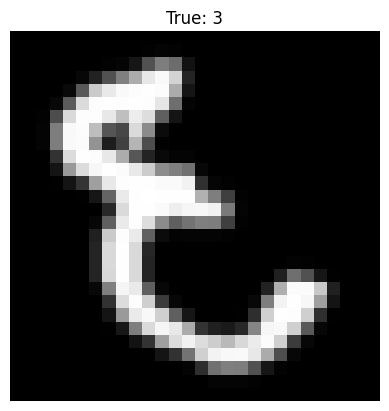

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
✅ True Label: 3
🤖 Predicted by Model: 3



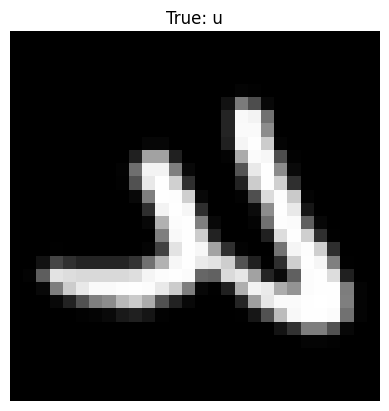

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
✅ True Label: u
🤖 Predicted by Model: U



In [ ]:
#I detected that imges are rotated its on upside down, so fixed it throught rotating it
import tensorflow as tf

for image, label in ds_test.take(5):
    # Rotate image by 270 degrees (or 3 times 90)
    img_rotated = tf.image.rot90(image, k=3).numpy().squeeze()
    lbl = label.numpy()

    import matplotlib.pyplot as plt
    plt.imshow(img_rotated, cmap='gray')
    plt.title(f"True: {emnist_labels[lbl]}")
    plt.axis('off')
    plt.show()

    # Prepare for prediction (normalize and add batch + channel dims)
    input_img = img_rotated / 255.0
    input_img = input_img.reshape(1, 28, 28, 1)

    prediction = model.predict(input_img)
    predicted_index = prediction.argmax()
    predicted_char = emnist_labels[predicted_index]

    print(f"✅ True Label: {emnist_labels[lbl]}")
    print(f"🤖 Predicted by Model: {predicted_char}\n")


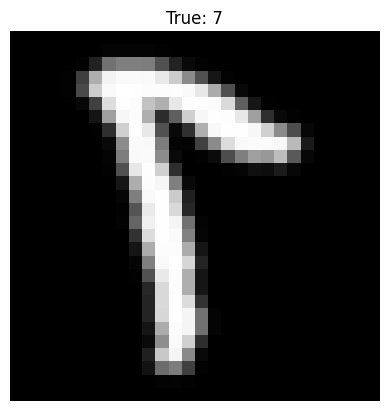

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
✅ True Label: 7
🤖 Predicted by Model: 7


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

for image, label in ds_test.skip(5).take(1):
    # Rotate the image properly
    img_rotated = tf.image.rot90(image, k=3).numpy().squeeze()
    lbl = label.numpy()

    # Show the rotated image
    plt.imshow(img_rotated, cmap='gray')
    plt.title(f"True: {emnist_labels[lbl]}")
    plt.axis('off')
    plt.show()

    # Prepare image for model input
    input_img = img_rotated / 255.0
    input_img = input_img.reshape(1, 28, 28, 1)

    # Predict
    prediction = model.predict(input_img)
    predicted_index = np.argmax(prediction)
    predicted_char = emnist_labels[predicted_index]

    print(f"✅ True Label: {emnist_labels[lbl]}")
    print(f"🤖 Predicted by Model: {predicted_char}")


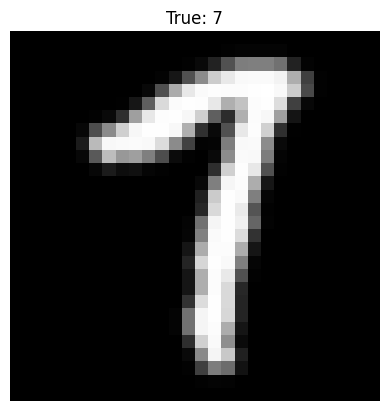

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
✅ True Label: 7
🤖 Predicted by Model: r


In [ ]:
#I detected that now imges are not in right left and right so fixed it
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

for image, label in ds_test.skip(5).take(1):
    # Rotate 270 degrees
    img_rotated = tf.image.rot90(image, k=3)
    # Flip left-right
    img_fixed = tf.image.flip_left_right(img_rotated).numpy().squeeze()

    lbl = label.numpy()

    plt.imshow(img_fixed, cmap='gray')
    plt.title(f"True: {emnist_labels[lbl]}")
    plt.axis('off')
    plt.show()

    # Prepare for model input
    input_img = img_fixed / 255.0
    input_img = input_img.reshape(1, 28, 28, 1)

    prediction = model.predict(input_img)
    predicted_index = np.argmax(prediction)
    predicted_char = emnist_labels[predicted_index]

    print(f"✅ True Label: {emnist_labels[lbl]}")
    print(f"🤖 Predicted by Model: {predicted_char}")


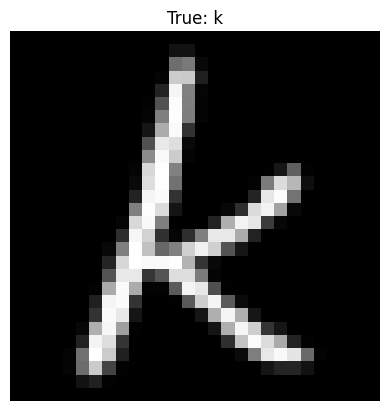

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
✅ True Label: k
🤖 Predicted by Model: t


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

for image, label in ds_test.skip(6).take(1):
    # Rotate 270 degrees
    img_rotated = tf.image.rot90(image, k=3)
    # Flip left-right
    img_fixed = tf.image.flip_left_right(img_rotated).numpy().squeeze()

    lbl = label.numpy()

    plt.imshow(img_fixed, cmap='gray')
    plt.title(f"True: {emnist_labels[lbl]}")
    plt.axis('off')
    plt.show()

    # Prepare for model input
    input_img = img_fixed / 255.0
    input_img = input_img.reshape(1, 28, 28, 1)

    prediction = model.predict(input_img)
    predicted_index = np.argmax(prediction)
    predicted_char = emnist_labels[predicted_index]

    print(f"✅ True Label: {emnist_labels[lbl]}")
    print(f"🤖 Predicted by Model: {predicted_char}")


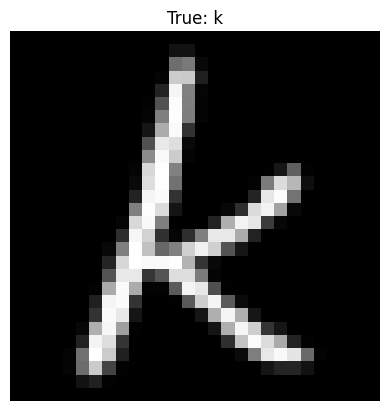

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
✅ True Label: k
🤖 Predicted by Model: t


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

for image, label in ds_test.skip(6).take(1):
    # Rotate 270 degrees
    img_rotated = tf.image.rot90(image, k=3)
    # Flip left-right
    img_fixed = tf.image.flip_left_right(img_rotated).numpy().squeeze()

    lbl = label.numpy()

    plt.imshow(img_fixed, cmap='gray')
    plt.title(f"True: {emnist_labels[lbl]}")
    plt.axis('off')
    plt.show()

    # Prepare for model input
    input_img = img_fixed / 255.0
    input_img = input_img.reshape(1, 28, 28, 1)

    prediction = model.predict(input_img)
    predicted_index = np.argmax(prediction)
    predicted_char = emnist_labels[predicted_index]

    print(f"✅ True Label: {emnist_labels[lbl]}")
    print(f"🤖 Predicted by Model: {predicted_char}")


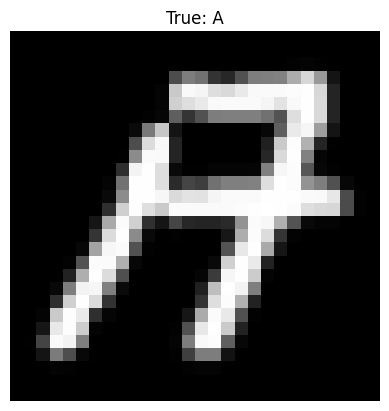

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
✅ True Label: A
🤖 Predicted by Model: A


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

for image, label in ds_test.skip(8).take(1):
    # Rotate 270 degrees
    img_rotated = tf.image.rot90(image, k=3)
    # Flip left-right
    img_fixed = tf.image.flip_left_right(img_rotated).numpy().squeeze()

    lbl = label.numpy()

    plt.imshow(img_fixed, cmap='gray')
    plt.title(f"True: {emnist_labels[lbl]}")
    plt.axis('off')
    plt.show()

    # Prepare for model input
    input_img = img_fixed / 255.0
    input_img = input_img.reshape(1, 28, 28, 1)

    prediction = model.predict(input_img)
    predicted_index = np.argmax(prediction)
    predicted_char = emnist_labels[predicted_index]

    print(f"✅ True Label: {emnist_labels[lbl]}")
    print(f"🤖 Predicted by Model: {predicted_char}")


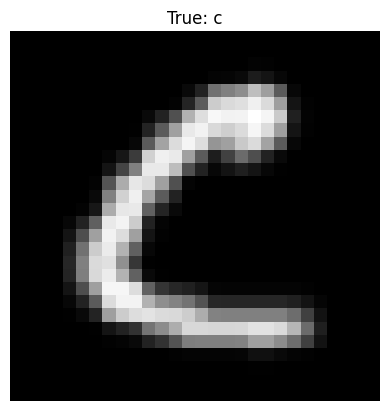

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
✅ True Label: c
🤖 Predicted by Model: J


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

for image, label in ds_test.skip(9).take(1):
    # Rotate 270 degrees
    img_rotated = tf.image.rot90(image, k=3)
    # Flip left-right
    img_fixed = tf.image.flip_left_right(img_rotated).numpy().squeeze()

    lbl = label.numpy()

    plt.imshow(img_fixed, cmap='gray')
    plt.title(f"True: {emnist_labels[lbl]}")
    plt.axis('off')
    plt.show()

    # Prepare for model input
    input_img = img_fixed / 255.0
    input_img = input_img.reshape(1, 28, 28, 1)

    prediction = model.predict(input_img)
    predicted_index = np.argmax(prediction)
    predicted_char = emnist_labels[predicted_index]

    print(f"✅ True Label: {emnist_labels[lbl]}")
    print(f"🤖 Predicted by Model: {predicted_char}")


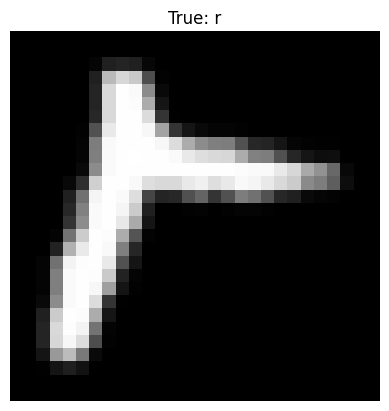

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
✅ True Label: r
🤖 Predicted by Model: t


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

for image, label in ds_test.skip(10).take(1):
    # Rotate 270 degrees
    img_rotated = tf.image.rot90(image, k=3)
    # Flip left-right
    img_fixed = tf.image.flip_left_right(img_rotated).numpy().squeeze()

    lbl = label.numpy()

    plt.imshow(img_fixed, cmap='gray')
    plt.title(f"True: {emnist_labels[lbl]}")
    plt.axis('off')
    plt.show()

    # Prepare for model input
    input_img = img_fixed / 255.0
    input_img = input_img.reshape(1, 28, 28, 1)

    prediction = model.predict(input_img)
    predicted_index = np.argmax(prediction)
    predicted_char = emnist_labels[predicted_index]

    print(f"✅ True Label: {emnist_labels[lbl]}")
    print(f"🤖 Predicted by Model: {predicted_char}")


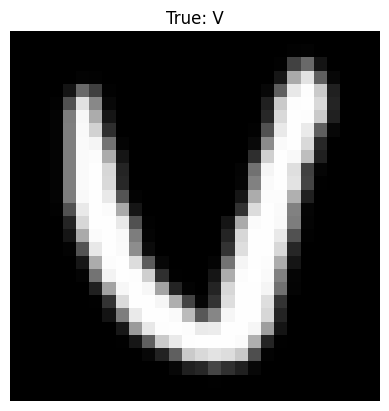

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
✅ True Label: V
🤖 Predicted by Model: V


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

for image, label in ds_test.skip(11).take(1):
    # Rotate 270 degrees
    img_rotated = tf.image.rot90(image, k=3)
    # Flip left-right
    img_fixed = tf.image.flip_left_right(img_rotated).numpy().squeeze()

    lbl = label.numpy()

    plt.imshow(img_fixed, cmap='gray')
    plt.title(f"True: {emnist_labels[lbl]}")
    plt.axis('off')
    plt.show()

    # Prepare for model input
    input_img = img_fixed / 255.0
    input_img = input_img.reshape(1, 28, 28, 1)

    prediction = model.predict(input_img)
    predicted_index = np.argmax(prediction)
    predicted_char = emnist_labels[predicted_index]

    print(f"✅ True Label: {emnist_labels[lbl]}")
    print(f"🤖 Predicted by Model: {predicted_char}")


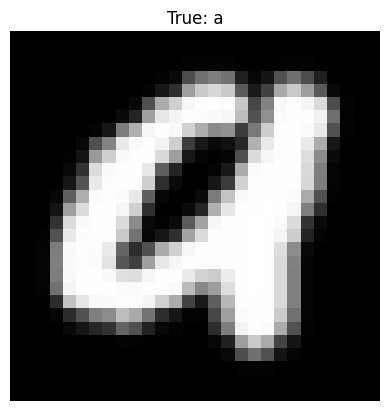

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
✅ True Label: a
🤖 Predicted by Model: D


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

for image, label in ds_test.skip(12).take(1):
    # Rotate 270 degrees
    img_rotated = tf.image.rot90(image, k=3)
    # Flip left-right
    img_fixed = tf.image.flip_left_right(img_rotated).numpy().squeeze()

    lbl = label.numpy()

    plt.imshow(img_fixed, cmap='gray')
    plt.title(f"True: {emnist_labels[lbl]}")
    plt.axis('off')
    plt.show()

    # Prepare for model input
    input_img = img_fixed / 255.0
    input_img = input_img.reshape(1, 28, 28, 1)

    prediction = model.predict(input_img)
    predicted_index = np.argmax(prediction)
    predicted_char = emnist_labels[predicted_index]

    print(f"✅ True Label: {emnist_labels[lbl]}")
    print(f"🤖 Predicted by Model: {predicted_char}")


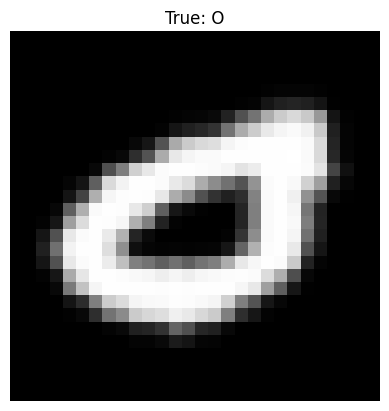

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
✅ True Label: O
🤖 Predicted by Model: O


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

for image, label in ds_test.skip(13).take(1):
    # Rotate 270 degrees
    img_rotated = tf.image.rot90(image, k=3)
    # Flip left-right
    img_fixed = tf.image.flip_left_right(img_rotated).numpy().squeeze()

    lbl = label.numpy()

    plt.imshow(img_fixed, cmap='gray')
    plt.title(f"True: {emnist_labels[lbl]}")
    plt.axis('off')
    plt.show()

    # Prepare for model input
    input_img = img_fixed / 255.0
    input_img = input_img.reshape(1, 28, 28, 1)

    prediction = model.predict(input_img)
    predicted_index = np.argmax(prediction)
    predicted_char = emnist_labels[predicted_index]

    print(f"✅ True Label: {emnist_labels[lbl]}")
    print(f"🤖 Predicted by Model: {predicted_char}")


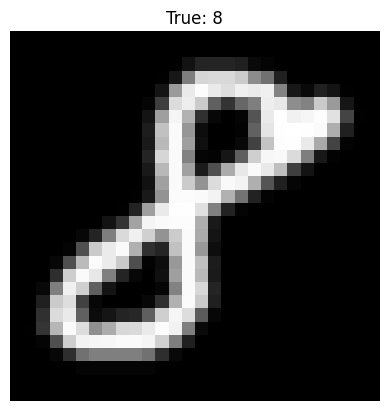

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
✅ True Label: 8
🤖 Predicted by Model: 8


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

for image, label in ds_test.skip(14).take(1):
    # Rotate 270 degrees
    img_rotated = tf.image.rot90(image, k=3)
    # Flip left-right
    img_fixed = tf.image.flip_left_right(img_rotated).numpy().squeeze()

    lbl = label.numpy()

    plt.imshow(img_fixed, cmap='gray')
    plt.title(f"True: {emnist_labels[lbl]}")
    plt.axis('off')
    plt.show()

    # Prepare for model input
    input_img = img_fixed / 255.0
    input_img = input_img.reshape(1, 28, 28, 1)

    prediction = model.predict(input_img)
    predicted_index = np.argmax(prediction)
    predicted_char = emnist_labels[predicted_index]

    print(f"✅ True Label: {emnist_labels[lbl]}")
    print(f"🤖 Predicted by Model: {predicted_char}")


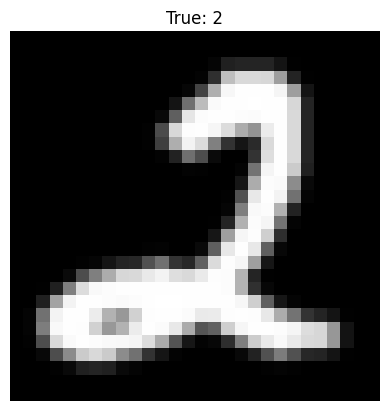

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
✅ True Label: 2
🤖 Predicted by Model: S


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

for image, label in ds_test.skip(15).take(1):
    # Rotate 270 degrees
    img_rotated = tf.image.rot90(image, k=3)
    # Flip left-right
    img_fixed = tf.image.flip_left_right(img_rotated).numpy().squeeze()

    lbl = label.numpy()

    plt.imshow(img_fixed, cmap='gray')
    plt.title(f"True: {emnist_labels[lbl]}")
    plt.axis('off')
    plt.show()

    # Prepare for model input
    input_img = img_fixed / 255.0
    input_img = input_img.reshape(1, 28, 28, 1)

    prediction = model.predict(input_img)
    predicted_index = np.argmax(prediction)
    predicted_char = emnist_labels[predicted_index]

    print(f"✅ True Label: {emnist_labels[lbl]}")
    print(f"🤖 Predicted by Model: {predicted_char}")


In [ ]:
#Checking my own image
from google.colab import files
uploaded = files.upload()


Saving A_test.png to A_test.png


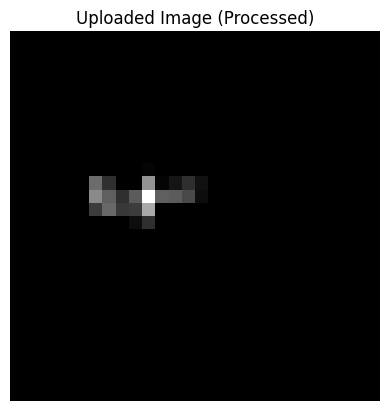

In [ ]:
from PIL import Image, ImageOps
import numpy as np

# Replace 'your_image_name.png' with the actual filename you uploaded
img_path = list(uploaded.keys())[0]

# Open and convert to grayscale
img = Image.open(img_path).convert('L')

# Resize to 28x28
img = img.resize((28, 28))

# Invert the image (black on white like EMNIST)
img = ImageOps.invert(img)

# Rotate and flip to match EMNIST style
img = img.rotate(270, expand=True)
img = ImageOps.mirror(img)

# Convert to numpy and normalize
img_array = np.array(img) / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

# Show the image
plt.imshow(img_array.squeeze(), cmap='gray')
plt.axis('off')
plt.title("Uploaded Image (Processed)")
plt.show()


In [ ]:
prediction = model.predict(img_array)
predicted_index = np.argmax(prediction)
predicted_char = emnist_labels[predicted_index]

print(f"🤖 Predicted Character: {predicted_char}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
🤖 Predicted Character: 1


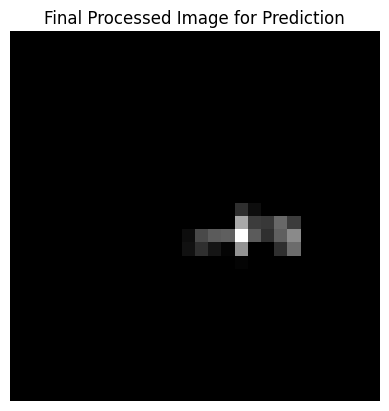

In [ ]:
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load your uploaded image
img_path = list(uploaded.keys())[0]  # Automatically get uploaded filename
img = Image.open(img_path).convert('L')  # Convert to grayscale

# Step 2: Resize to 28x28
img = img.resize((28, 28))

# Step 3: Invert colors (white background, black digit/letter)
img = ImageOps.invert(img)

# Step 4: Rotate 90° counter-clockwise
img = img.rotate(90, expand=True)

# Step 5: Flip left-right (horizontal mirror)
img = ImageOps.mirror(img)

# Step 6: Normalize and reshape
img_array = np.array(img) / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

# Step 7: Show processed image
plt.imshow(img_array.squeeze(), cmap='gray')
plt.axis('off')
plt.title("Final Processed Image for Prediction")
plt.show()


In [ ]:
# Predict the class
prediction = model.predict(img_array)

# Get the predicted class index
predicted_index = np.argmax(prediction)

# Map the index to character (assuming you have the label map)
predicted_char = emnist_labels[predicted_index]

# Print result
print(f"✅ Predicted Character: {predicted_char}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
✅ Predicted Character: l


In [ ]:
#For speed up the process done these

In [ ]:
# Add a ModelCheckpoint callback to save after every epoch
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_cb = ModelCheckpoint("best_model.h5", save_best_only=False)

history = model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=25,
    callbacks=[checkpoint_cb]
)


In [ ]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
#dowloaded model load for resuming the process then no need to run again all codes
from google.colab import files
uploaded = files.upload()


Saving emnist_model.h5 to emnist_model.h5


In [ ]:
#check the model loaded correctly
import os
print(os.listdir())


['.config', 'emnist_model.h5', 'sample_data']


In [ ]:
from tensorflow.keras.models import load_model
model = load_model("emnist_model.h5")
print("Model loaded successfully!")


Model loaded successfully!


In [ ]:
print("Upload your handwritten image file (png/jpg):")
uploaded_img = files.upload()

Upload your handwritten image file (png/jpg):


Saving W1.png to W1.png


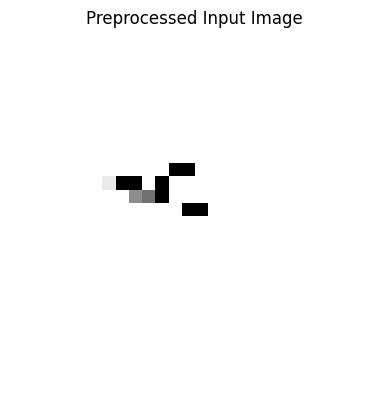

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Replace with your uploaded image filename here
image_filename = list(uploaded_img.keys())[0]

# Load image in grayscale
img = cv2.imread(image_filename, cv2.IMREAD_GRAYSCALE)

if img is None:
    raise FileNotFoundError(f"Image {image_filename} not found or unreadable!")

# Resize to 28x28 (EMNIST input size)
img = cv2.resize(img, (28, 28))

# Rotate and flip to match EMNIST orientation
img = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
img = cv2.flip(img, 0)

# Normalize pixel values (0 to 1)
img = img.astype("float32") / 255.0

# Reshape for model: (1, 28, 28, 1)
img = img.reshape(1, 28, 28, 1)

# Show the image
plt.imshow(img.reshape(28, 28), cmap='gray')
plt.title("Preprocessed Input Image")
plt.axis('off')
plt.show()


In [ ]:
# Predict
prediction = model.predict(img)

# Get the class index with highest probability
predicted_class = np.argmax(prediction)

# Map predicted class index to actual character (digits + uppercase + lowercase)
import string
characters = list(string.digits + string.ascii_uppercase + string.ascii_lowercase)

predicted_char = characters[predicted_class]

print(f"Predicted class index: {predicted_class}")
print(f"Predicted character: {predicted_char}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted class index: 52
Predicted character: q


In [ ]:
import cv2
import numpy as np

# Load grayscale image
img = cv2.imread("Drawing.png", cv2.IMREAD_GRAYSCALE)

# Resize with interpolation
img = cv2.resize(img, (28, 28), interpolation=cv2.INTER_AREA)

# Optional: threshold to binary image
_, img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Normalize to 0-1
img = img.astype('float32') / 255.0

# Reshape for model
img = img.reshape(1, 28, 28, 1)


In [ ]:
print("Upload your handwritten image file (png/jpg):")
uploaded_img = files.upload()

Upload your handwritten image file (png/jpg):


Saving W1.png to W1 (1).png


In [ ]:
import cv2

img = cv2.imread("W1.png", cv2.IMREAD_GRAYSCALE)  # Replace with your filename

if img is None:
    raise FileNotFoundError("Image not found! Check filename or upload again.")


In [ ]:
img = cv2.resize(img, (28, 28), interpolation=cv2.INTER_AREA)


In [ ]:
_, img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)


In [ ]:
img = img.astype("float32") / 255.0


In [ ]:
img = img.reshape(1, 28, 28, 1)


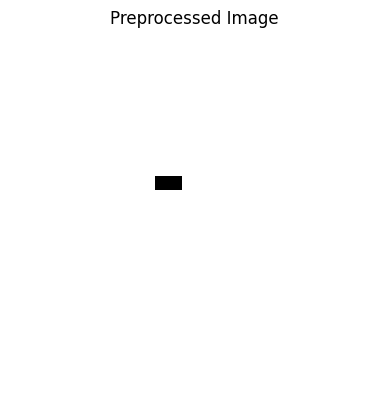

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(img.reshape(28, 28), cmap='gray')
plt.title("Preprocessed Image")
plt.axis('off')
plt.show()


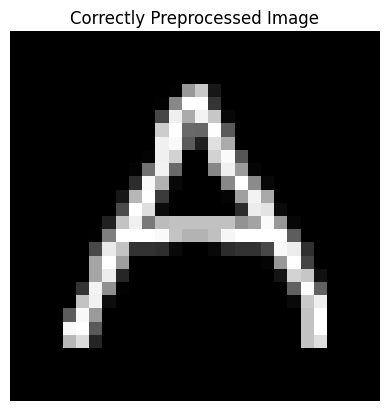

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load your uploaded image
img = cv2.imread('W1.png', cv2.IMREAD_GRAYSCALE)

# Threshold to binary image
_, img_bin = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

# Find contours (connected components)
contours, _ = cv2.findContours(img_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find bounding box of the largest contour (your letter)
cnt = max(contours, key=cv2.contourArea)
x, y, w, h = cv2.boundingRect(cnt)

# Crop the letter region
cropped = img[y:y+h, x:x+w]

# Resize the cropped letter to 20x20 to keep aspect ratio, later pad to 28x28
resized = cv2.resize(cropped, (20, 20), interpolation=cv2.INTER_AREA)

# Create a blank 28x28 image
canvas = np.ones((28, 28), dtype=np.uint8) * 255  # white background

# Calculate center offset to put 20x20 in the center of 28x28
x_offset = (28 - 20) // 2
y_offset = (28 - 20) // 2

# Place resized letter on the white canvas
canvas[y_offset:y_offset+20, x_offset:x_offset+20] = resized

# Invert colors back if needed (model trained on white-on-black)
canvas = 255 - canvas

# Normalize pixels
img_normalized = canvas.astype('float32') / 255.0

# Show the final preprocessed image
plt.imshow(img_normalized, cmap='gray')
plt.title('Correctly Preprocessed Image')
plt.axis('off')
plt.show()

# Reshape for model input
img_input = img_normalized.reshape(1, 28, 28, 1)


In [ ]:
prediction = model.predict(img_input)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


In [ ]:
prediction = model.predict(img_input)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [ ]:
import numpy as np
predicted_index = np.argmax(prediction)


In [ ]:
import string

# EMNIST byclass character map
label_map = list("0123456789" + string.ascii_uppercase + string.ascii_lowercase)
predicted_label = label_map[predicted_index]

print(f"Predicted character: {predicted_label}")


Predicted character: A


In [ ]:
print("Upload your handwritten image file (png/jpg):")
uploaded_img = files.upload()

Upload your handwritten image file (png/jpg):


Saving W2.png to W2.png


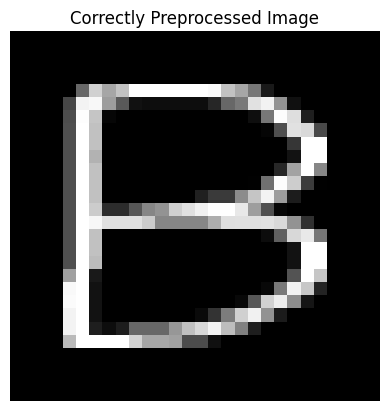

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load your uploaded image
img = cv2.imread('W2.png', cv2.IMREAD_GRAYSCALE)

# Threshold to binary image
_, img_bin = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

# Find contours (connected components)
contours, _ = cv2.findContours(img_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find bounding box of the largest contour (your letter)
cnt = max(contours, key=cv2.contourArea)
x, y, w, h = cv2.boundingRect(cnt)

# Crop the letter region
cropped = img[y:y+h, x:x+w]

# Resize the cropped letter to 20x20 to keep aspect ratio, later pad to 28x28
resized = cv2.resize(cropped, (20, 20), interpolation=cv2.INTER_AREA)

# Create a blank 28x28 image
canvas = np.ones((28, 28), dtype=np.uint8) * 255  # white background

# Calculate center offset to put 20x20 in the center of 28x28
x_offset = (28 - 20) // 2
y_offset = (28 - 20) // 2

# Place resized letter on the white canvas
canvas[y_offset:y_offset+20, x_offset:x_offset+20] = resized

# Invert colors back if needed (model trained on white-on-black)
canvas = 255 - canvas

# Normalize pixels
img_normalized = canvas.astype('float32') / 255.0

# Show the final preprocessed image
plt.imshow(img_normalized, cmap='gray')
plt.title('Correctly Preprocessed Image')
plt.axis('off')
plt.show()

# Reshape for model input
img_input = img_normalized.reshape(1, 28, 28, 1)


In [ ]:
prediction = model.predict(img_input)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


In [ ]:
import numpy as np
predicted_index = np.argmax(prediction)


In [ ]:
import numpy as np
predicted_index = np.argmax(prediction)


In [ ]:
import string

# EMNIST byclass character map
label_map = list("0123456789" + string.ascii_uppercase + string.ascii_lowercase)
predicted_label = label_map[predicted_index]

print(f"Predicted character: {predicted_label}")


Predicted character: 8


In [ ]:
#dowloaded model load for resuming the process then no need to run again all codes
from google.colab import files
uploaded = files.upload()


Saving emnist_model.h5 to emnist_model.h5


In [ ]:
print("Upload your handwritten image file (png/jpg):")
uploaded_img = files.upload()

Upload your handwritten image file (png/jpg):


Saving P.png to P.png


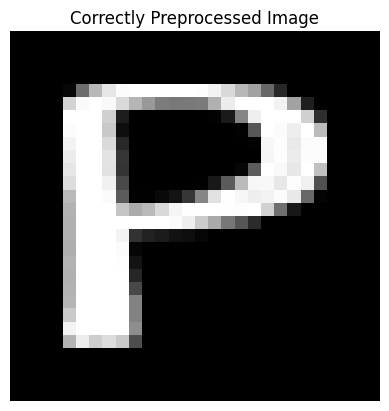

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load your uploaded image
img = cv2.imread('P.png', cv2.IMREAD_GRAYSCALE)

# Threshold to binary image
_, img_bin = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

# Find contours (connected components)
contours, _ = cv2.findContours(img_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find bounding box of the largest contour (your letter)
cnt = max(contours, key=cv2.contourArea)
x, y, w, h = cv2.boundingRect(cnt)

# Crop the letter region
cropped = img[y:y+h, x:x+w]

# Resize the cropped letter to 20x20 to keep aspect ratio, later pad to 28x28
resized = cv2.resize(cropped, (20, 20), interpolation=cv2.INTER_AREA)

# Create a blank 28x28 image
canvas = np.ones((28, 28), dtype=np.uint8) * 255  # white background

# Calculate center offset to put 20x20 in the center of 28x28
x_offset = (28 - 20) // 2
y_offset = (28 - 20) // 2

# Place resized letter on the white canvas
canvas[y_offset:y_offset+20, x_offset:x_offset+20] = resized

# Invert colors back if needed (model trained on white-on-black)
canvas = 255 - canvas

# Normalize pixels
img_normalized = canvas.astype('float32') / 255.0

# Show the final preprocessed image
plt.imshow(img_normalized, cmap='gray')
plt.title('Correctly Preprocessed Image')
plt.axis('off')
plt.show()

# Reshape for model input
img_input = img_normalized.reshape(1, 28, 28, 1)


In [ ]:
prediction = model.predict(img_input)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


In [ ]:
from google.colab import files

print("Upload your trained model (.h5) file:")
uploaded = files.upload()


Upload your trained model (.h5) file:


Saving emnist_model.h5 to emnist_model.h5


In [ ]:
from tensorflow.keras.models import load_model

model = load_model('emnist_model.h5')
print("Model loaded successfully!")


Model loaded successfully!


In [ ]:
print("Upload your handwritten image:")
uploaded_img = files.upload()

from PIL import Image
import numpy as np

# Get uploaded image filename
img_filename = list(uploaded_img.keys())[0]

# Process the image
img = Image.open(img_filename).convert('L')
img = img.resize((28, 28))
img = np.invert(img)  # EMNIST is white on black
img_array = np.array(img) / 255.0
img_array = img_array.reshape(1, 28, 28, 1)


Upload your handwritten image:


Saving 6.png to 6.png


In [ ]:
import string

# Predict
prediction = model.predict(img_array)
predicted_index = np.argmax(prediction)

# EMNIST ByClass label map
label_map = list("0123456789" + string.ascii_uppercase + string.ascii_lowercase)
predicted_label = label_map[predicted_index]

print(f"Predicted character: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted character: o


In [ ]:
print("Upload your handwritten image:")
uploaded_img = files.upload()

from PIL import Image
import numpy as np

# Get uploaded image filename
img_filename = list(uploaded_img.keys())[0]

# Process the image
img = Image.open(img_filename).convert('L')
img = img.resize((28, 28))
img = np.invert(img)  # EMNIST is white on black
img_array = np.array(img) / 255.0
img_array = img_array.reshape(1, 28, 28, 1)


Upload your handwritten image:


Saving 5.png to 5.png


In [ ]:
import string

# Predict
prediction = model.predict(img_array)
predicted_index = np.argmax(prediction)

# EMNIST ByClass label map
label_map = list("0123456789" + string.ascii_uppercase + string.ascii_lowercase)
predicted_label = label_map[predicted_index]

print(f"Predicted character: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Predicted character: C


Upload your trained model (.h5):


Saving emnist_model.h5 to emnist_model (1).h5
✅ Model loaded successfully!
Upload your handwritten image (jpg/png):


Saving 6.png to 6 (1).png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


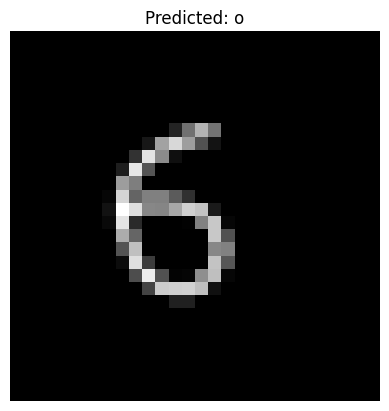

In [ ]:
# Step 1: Upload your trained model
from google.colab import files
from tensorflow.keras.models import load_model
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import string

print("Upload your trained model (.h5):")
uploaded = files.upload()

# Load the model
model_filename = list(uploaded.keys())[0]
model = load_model(model_filename)
print("✅ Model loaded successfully!")

# Step 2: Upload handwritten image
print("Upload your handwritten image (jpg/png):")
uploaded_img = files.upload()

# Load and process image
img_filename = list(uploaded_img.keys())[0]
img = Image.open(img_filename).convert('L')  # convert to grayscale
img = img.resize((28, 28))                   # resize to 28x28
img = np.invert(img)                         # EMNIST expects white on black

# Normalize and reshape
img_array = np.array(img) / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

# Step 3: Predict
prediction = model.predict(img_array)
predicted_index = np.argmax(prediction)

# Step 4: Map label
label_map = list("0123456789" + string.ascii_uppercase + string.ascii_lowercase)
predicted_label = label_map[predicted_index]

# Step 5: Show image with prediction
plt.imshow(img, cmap='gray')
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()


In [ ]:
print("Upload your handwritten image (jpg/png):")
uploaded_img = files.upload()


Upload your handwritten image (jpg/png):


Saving 5.png to 5 (1).png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


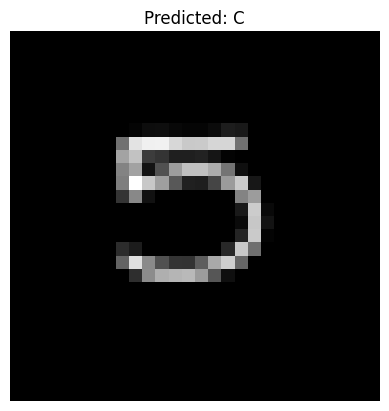

In [ ]:
# Load and process image
img_filename = list(uploaded_img.keys())[0]
img = Image.open(img_filename).convert('L')  # convert to grayscale
img = img.resize((28, 28))                   # resize to 28x28
img = np.invert(img)                         # EMNIST expects white on black

# Normalize and reshape
img_array = np.array(img) / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

# Step 3: Predict
prediction = model.predict(img_array)
predicted_index = np.argmax(prediction)

# Step 4: Map label
label_map = list("0123456789" + string.ascii_uppercase + string.ascii_lowercase)
predicted_label = label_map[predicted_index]

# Step 5: Show image with prediction
plt.imshow(img, cmap='gray')
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()


Upload your handwritten image (jpg/png):


Saving 10.png to 10.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


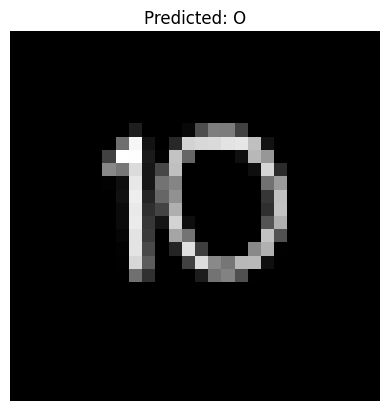

In [ ]:
# Step 2: Upload handwritten image
print("Upload your handwritten image (jpg/png):")
uploaded_img = files.upload()

# Load and process image
img_filename = list(uploaded_img.keys())[0]
img = Image.open(img_filename).convert('L')  # convert to grayscale
img = img.resize((28, 28))                   # resize to 28x28
img = np.invert(img)                         # EMNIST expects white on black

# Normalize and reshape
img_array = np.array(img) / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

# Step 3: Predict
prediction = model.predict(img_array)
predicted_index = np.argmax(prediction)

# Step 4: Map label
label_map = list("0123456789" + string.ascii_uppercase + string.ascii_lowercase)
predicted_label = label_map[predicted_index]

# Step 5: Show image with prediction
plt.imshow(img, cmap='gray')
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()

Upload your handwritten image (jpg/png):


Saving q.png to q.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


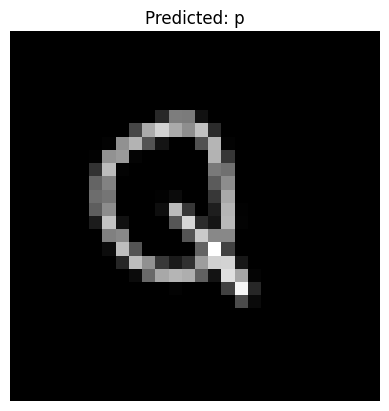

In [ ]:
# Step 2: Upload handwritten image
print("Upload your handwritten image (jpg/png):")
uploaded_img = files.upload()

# Load and process image
img_filename = list(uploaded_img.keys())[0]
img = Image.open(img_filename).convert('L')  # convert to grayscale
img = img.resize((28, 28))                   # resize to 28x28
img = np.invert(img)                         # EMNIST expects white on black

# Normalize and reshape
img_array = np.array(img) / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

# Step 3: Predict
prediction = model.predict(img_array)
predicted_index = np.argmax(prediction)

# Step 4: Map label
label_map = list("0123456789" + string.ascii_uppercase + string.ascii_lowercase)
predicted_label = label_map[predicted_index]

# Step 5: Show image with prediction
plt.imshow(img, cmap='gray')
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()

Upload your handwritten image (jpg/png):


Saving P.png to P.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


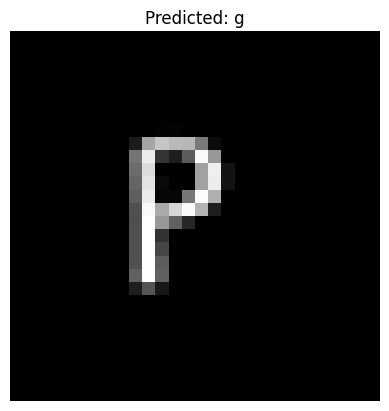

In [ ]:
# Step 2: Upload handwritten image
print("Upload your handwritten image (jpg/png):")
uploaded_img = files.upload()

# Load and process image
img_filename = list(uploaded_img.keys())[0]
img = Image.open(img_filename).convert('L')  # convert to grayscale
img = img.resize((28, 28))                   # resize to 28x28
img = np.invert(img)                         # EMNIST expects white on black

# Normalize and reshape
img_array = np.array(img) / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

# Step 3: Predict
prediction = model.predict(img_array)
predicted_index = np.argmax(prediction)

# Step 4: Map label
label_map = list("0123456789" + string.ascii_uppercase + string.ascii_lowercase)
predicted_label = label_map[predicted_index]

# Step 5: Show image with prediction
plt.imshow(img, cmap='gray')
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()

Upload your handwritten image (jpg/png):


Saving 2 (2).png to 2 (2).png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


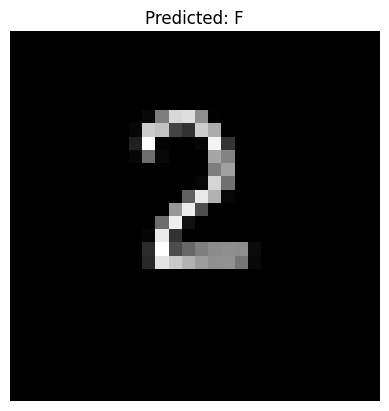

In [ ]:
# Step 2: Upload handwritten image
print("Upload your handwritten image (jpg/png):")
uploaded_img = files.upload()

# Load and process image
img_filename = list(uploaded_img.keys())[0]
img = Image.open(img_filename).convert('L')  # convert to grayscale
img = img.resize((28, 28))                   # resize to 28x28
img = np.invert(img)                         # EMNIST expects white on black

# Normalize and reshape
img_array = np.array(img) / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

# Step 3: Predict
prediction = model.predict(img_array)
predicted_index = np.argmax(prediction)

# Step 4: Map label
label_map = list("0123456789" + string.ascii_uppercase + string.ascii_lowercase)
predicted_label = label_map[predicted_index]

# Step 5: Show image with prediction
plt.imshow(img, cmap='gray')
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()

Upload your handwritten image (jpg/png):


Saving 7.png to 7.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


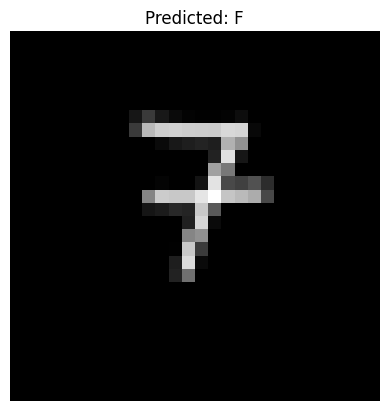

In [ ]:
# Step 2: Upload handwritten image
print("Upload your handwritten image (jpg/png):")
uploaded_img = files.upload()

# Load and process image
img_filename = list(uploaded_img.keys())[0]
img = Image.open(img_filename).convert('L')  # convert to grayscale
img = img.resize((28, 28))                   # resize to 28x28
img = np.invert(img)                         # EMNIST expects white on black

# Normalize and reshape
img_array = np.array(img) / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

# Step 3: Predict
prediction = model.predict(img_array)
predicted_index = np.argmax(prediction)

# Step 4: Map label
label_map = list("0123456789" + string.ascii_uppercase + string.ascii_lowercase)
predicted_label = label_map[predicted_index]

# Step 5: Show image with prediction
plt.imshow(img, cmap='gray')
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!git config --global user.email "umeshasewwandi420@gmail.com"
!git config --global user.name "AKUSAbeysinghe"


In [ ]:
!git clone https://github.com/AKUSAbeysinghe/emnist-model-project


Cloning into 'emnist-model-project'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.


In [ ]:
!cp /content/emnist_model.h5 emnist-model-project/
!cp /content/HandWritten recognition.ipynb emnist-model-project/


cp: cannot stat '/content/HandWritten': No such file or directory
cp: cannot stat 'recognition.ipynb': No such file or directory


In [ ]:
!cp /content/emnist_model.h5 emnist-model-project/
!cp /content/Hand Written recognition.ipynb emnist-model-project/

cp: cannot stat '/content/Hand': No such file or directory
cp: cannot stat 'Written': No such file or directory
cp: cannot stat 'recognition.ipynb': No such file or directory


In [ ]:
!cp /content/emnist_model.h5 emnist-model-project/
!cp "/content/Hand Written recognition.ipynb" emnist-model-project/


cp: cannot stat '/content/Hand Written recognition.ipynb': No such file or directory


In [ ]:
!cp "/content/Hand Written recognition. ipynb" emnist-model-project/


cp: cannot stat '/content/Hand Written recognition. ipynb': No such file or directory
